<a href="https://colab.research.google.com/github/Frank-Chen515/BigData/blob/main/0601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pkgs<-c("tidyverse","lubridate")
install.packages(pkgs)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(lubridate)

In [12]:
covid19 <- read.csv('covid19.csv',fileEncoding = "Big5")

In [13]:
print(covid19)

               確定病名 個案研判日   縣市     鄉鎮 性別 是否為境外移入 年齡層
1    嚴重特殊傳染性肺炎   20200122   空值     空值   女             是  55-59
2    嚴重特殊傳染性肺炎   20200124   空值     空值   女             是  50-54
3    嚴重特殊傳染性肺炎   20200124   空值     空值   男             是  55-59
4    嚴重特殊傳染性肺炎   20200126   空值     空值   女             是  55-59
5    嚴重特殊傳染性肺炎   20200127   空值     空值   女             是  50-54
6    嚴重特殊傳染性肺炎   20200128   空值     空值   女             是    70+
7    嚴重特殊傳染性肺炎   20200128 彰化縣   和美鎮   男             否  50-54
8    嚴重特殊傳染性肺炎   20200130 南投縣   南投市   女             否  40-44
9    嚴重特殊傳染性肺炎   20200131   空值     空值   男             是  40-44
10   嚴重特殊傳染性肺炎   20200204   空值     空值   男             是  50-54
11   嚴重特殊傳染性肺炎   20200206   空值     空值   女             是  25-29
12   嚴重特殊傳染性肺炎   20200206   空值     空值   女             是  45-49
13   嚴重特殊傳染性肺炎   20200206   空值     空值   男             是  45-49
14   嚴重特殊傳染性肺炎   20200207   空值     空值   女             是  50-54
15   嚴重特殊傳染性肺炎   20200207   空值     空值   男             是  50-54
16   嚴

In [14]:
covid19 %>% count(年齡層)

年齡層,n
<chr>,<int>
0,22
1,27
10-14,87
15-19,159
2,15
20-24,347
25-29,421
3,19
30-34,429


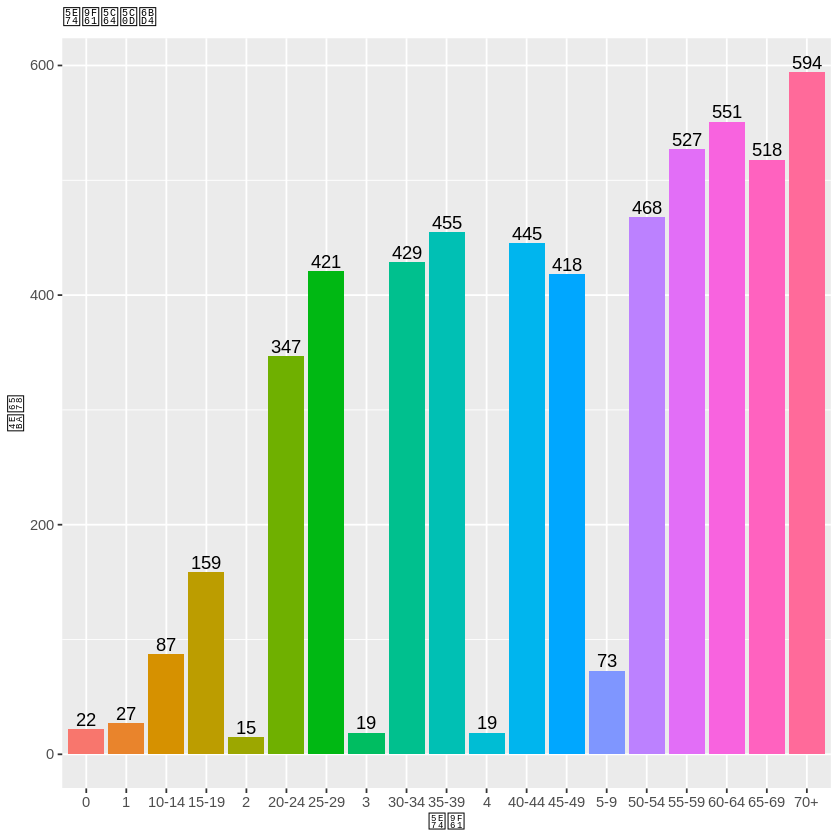

In [18]:
covid19 %>%
  count(年齡層) %>%
  ggplot(aes(x = 年齡層, y=n, fill = 年齡層)) + 
  geom_col() + 
  geom_text(aes(label = n), vjust = -0.25) + 
  labs(title = "年齡層對比", x= "年齡", y="人數") + theme(legend.position = "none")

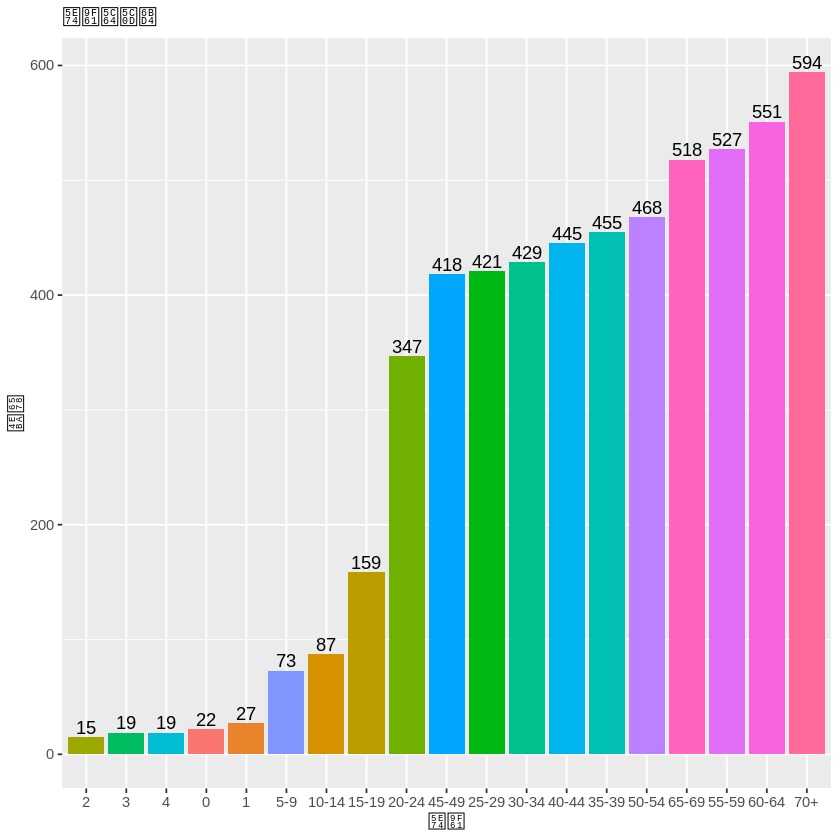

In [19]:
covid19 %>%
  count(年齡層) %>%
  ggplot(aes(x = fct_reorder(年齡層, n) ,y=n, fill = 年齡層)) + 
  geom_col() + 
  geom_text(aes(label = n), vjust = -0.25) + 
  labs(title = "年齡層對比", x= "年齡", y="人數") + theme(legend.position = "none")

In [22]:
covid19 %>% count(確定病例數)

確定病例數,n
<int>,<int>
1,4185
2,794
3,301
4,132
5,63
6,41
7,23
8,14
9,12


In [25]:
covid19 %>%
  dplyr::filter(縣市 == "台北市") %>%
  dplyr::select(性別, 是否為境外移入, 年齡層)

性別,是否為境外移入,年齡層
<chr>,<chr>,<chr>
女,否,15-19
男,否,35-39
女,否,35-39
女,否,45-49
男,否,20-24
女,否,50-54
女,否,45-49
男,否,20-24
女,否,45-49


In [26]:
covid19 %>%
  dplyr::filter(年齡層 == "30-34") %>%
  dplyr::select(性別, 縣市, 鄉鎮, 確定病例數)

性別,縣市,鄉鎮,確定病例數
<chr>,<chr>,<chr>,<int>
男,台中市,太平區,1
女,新北市,中和區,1
男,空值,空值,1
男,空值,空值,1
男,空值,空值,1
男,空值,空值,1
男,空值,空值,1
女,空值,空值,2
男,空值,空值,3


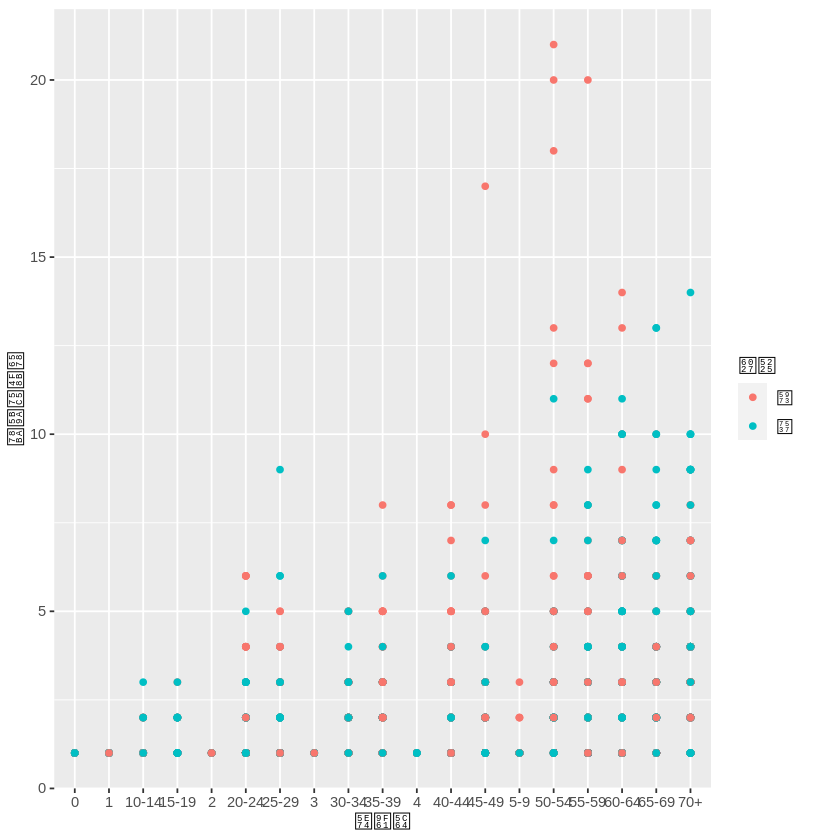

In [29]:
qplot(年齡層,確定病例數,data=covid19,color=性別)

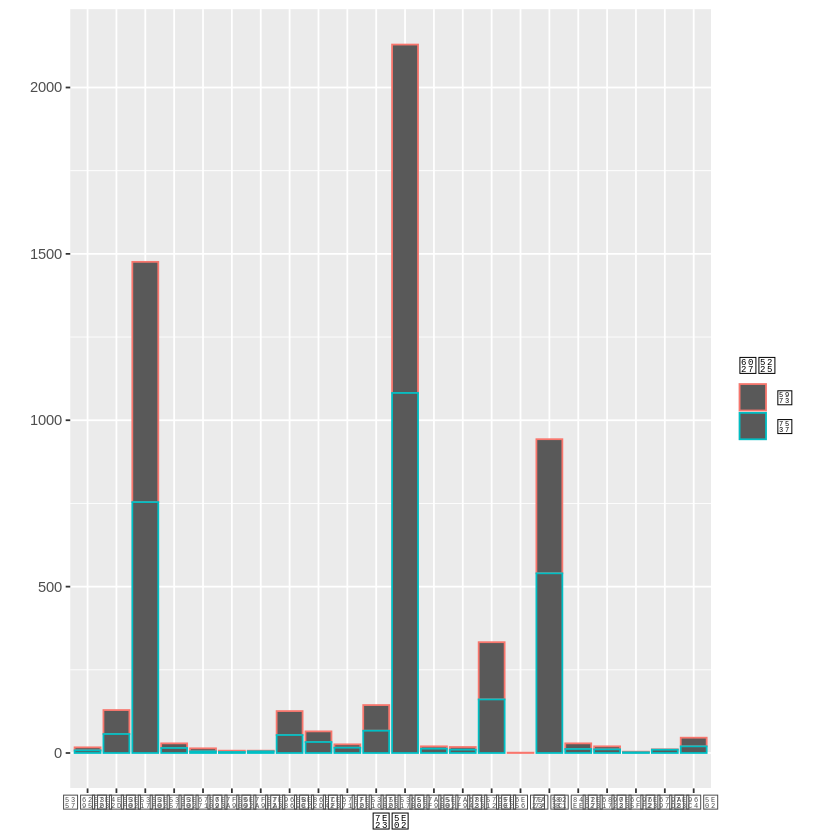

In [30]:
qplot(縣市,data=covid19,color=性別)

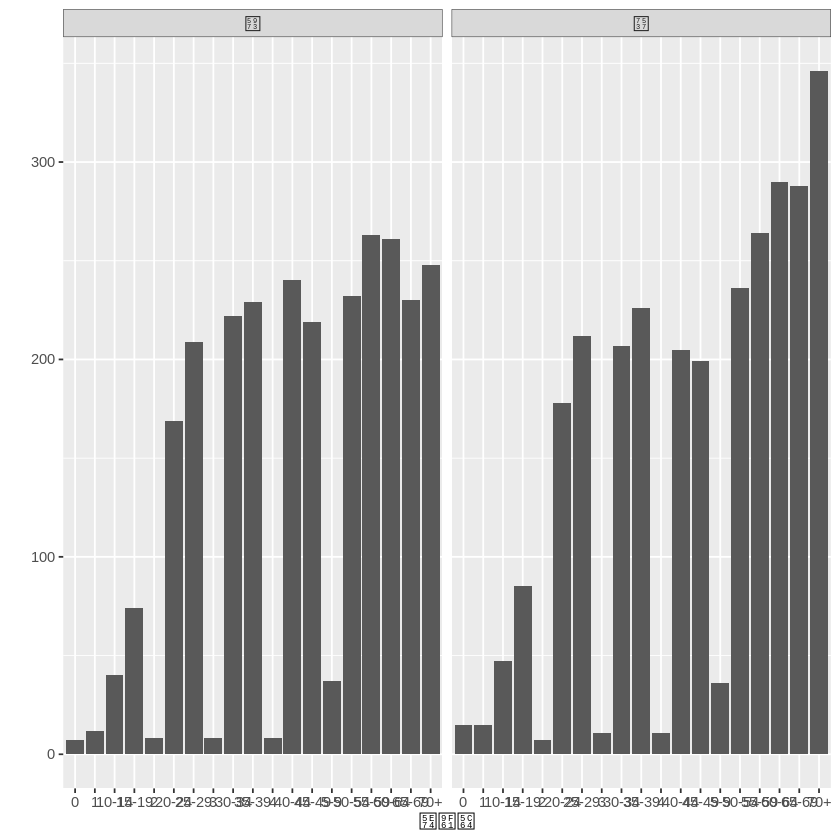

In [34]:
qplot(年齡層,data=covid19,facets=.~性別)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



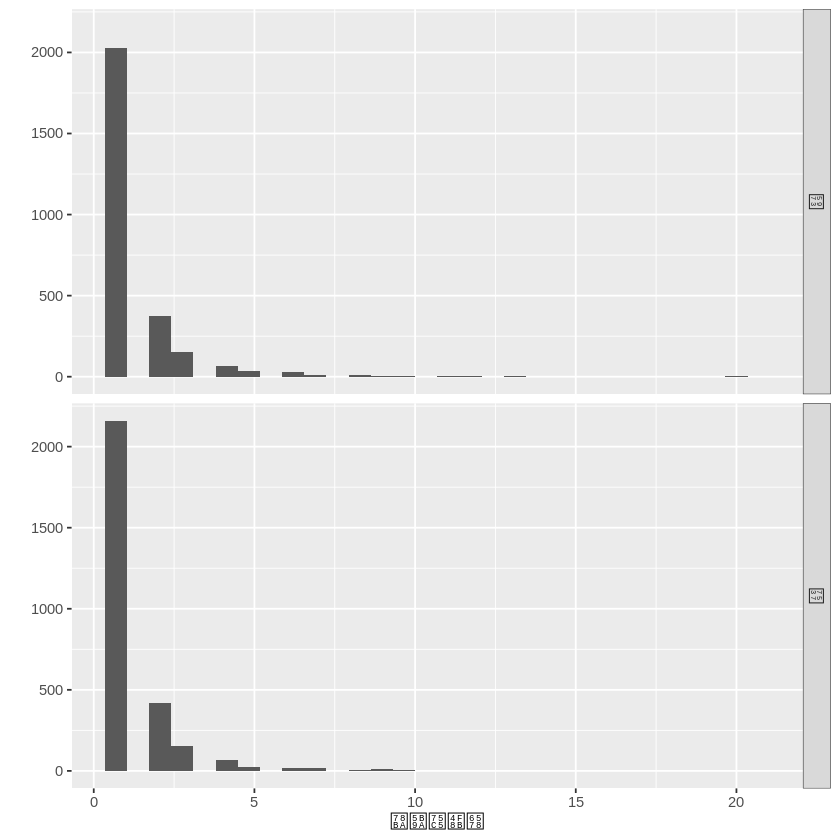

In [35]:
qplot(確定病例數,data=covid19,facets=性別~.)

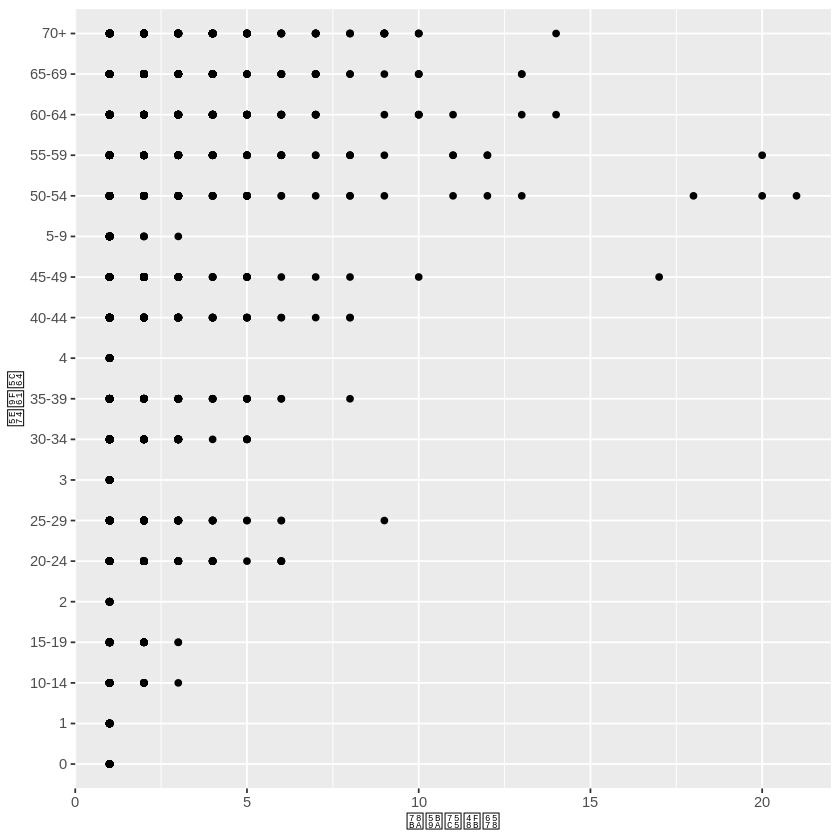

In [44]:
qplot(確定病例數,年齡層, data=covid19)